<Figure size 1500x200 with 0 Axes>

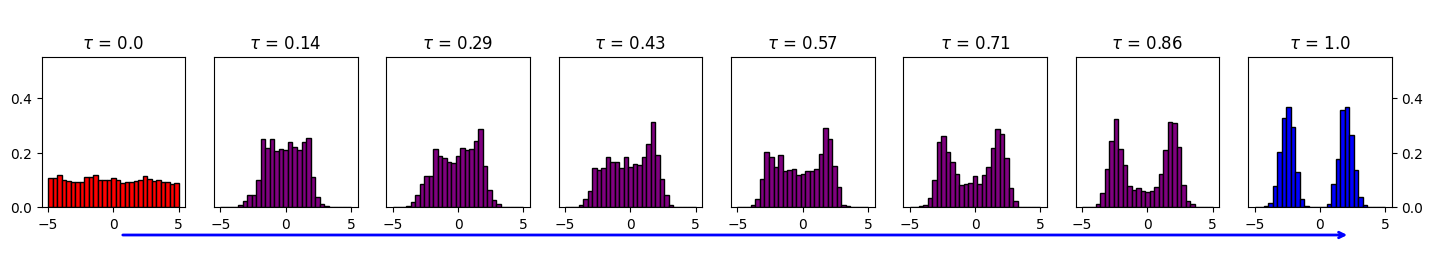

In [39]:
import numpy as np
from matplotlib import pyplot as plt


# Let's generate the data for the histogram plots that simulate a distribution changing over time

# Parameters for the distributions
num_bins = 30
num_samples = 3000
time_steps = 8

# Parameters for the Gaussian mixture model
mean1 = -2.5
mean2 = 2.0
std_dev = 0.5  # Assuming the same standard deviation for both components
weight1 = 0.5  # Weight of the first component
weight2 = 0.5  # Weight of the second component

# Initialize a list to hold the data for each time step
hist_data = []

# Create a uniform distribution for t=0
hist_data.append(np.random.uniform(-5, 5, num_samples))

# Create intermediate steps where the distribution "morphs" from uniform to normal
for t in range(1, time_steps - 1):
    # Linearly interpolate between uniform and normal distribution

    num_samples_gaussian = int(num_samples * t / time_steps)
    data_uniform = np.random.uniform(-2, 2, num_samples - num_samples_gaussian)
    
     
    # Calculate the number of samples for each component based on the weights
    num_samples_component1 = int(num_samples_gaussian * weight1)
    num_samples_component2 = num_samples_gaussian - num_samples_component1

    # Generate samples for each component
    samples_component1 = np.random.normal(mean1, std_dev, num_samples_component1)
    samples_component2 = np.random.normal(mean2, std_dev, num_samples_component2)

    data_gaussian_mixture = np.concatenate([samples_component1, samples_component2])

    hist_data.append(np.concatenate([data_uniform, data_gaussian_mixture]))

# Create a normal distribution for t=1
num_samples_gaussian = int(num_samples)
data_uniform = np.random.uniform(-2, 2, num_samples - num_samples_gaussian)

    
# Calculate the number of samples for each component based on the weights
num_samples_component1 = int(num_samples_gaussian * weight1)
num_samples_component2 = num_samples_gaussian - num_samples_component1

# Generate samples for each component
samples_component1 = np.random.normal(mean1, std_dev, num_samples_component1)
samples_component2 = np.random.normal(mean2, std_dev, num_samples_component2)

data_gaussian_mixture = np.concatenate([samples_component1, samples_component2])

hist_data.append(data_gaussian_mixture)

# Plot the histograms
plt.figure(figsize=(15, 2))

# We want to use the same bins for all histograms
bins = np.linspace(-5, 5, num_bins)

fig, axs = plt.subplots(1, time_steps, figsize=(15, 3))
# Generate each subplot
for i, data in enumerate(hist_data):
    if i == 0:
        axs[i].hist(data, bins=bins, color='red', edgecolor='black',density=True)
    elif i == time_steps - 1:
        axs[i].hist(data, bins=bins, color='blue', edgecolor='black',density=True)
    else:
        axs[i].hist(data, bins=bins, color='purple', edgecolor='black',density=True)
    axs[i].set_ylim(0, 0.55)  # Fix the y-axis for comparison
    axs[i].title.set_text(r"$\tau$ = {0}".format(round(i / (time_steps - 1),2)))

    # Remove y-axis ticks for all except the first and last
    if i == 0:
        axs[i].tick_params(axis='y', which='both', left=True, labelleft=True)
    elif i == time_steps - 1:
        axs[i].tick_params(axis='y', which='both', left=False, labelleft=False, right=True,labelright=True)
    else:
        axs[i].set_yticks([])  # Remove x-axis ticks for all

top_y = 0.9
# Add arrows using figure coordinates
# Right-pointing arrow across the top
axs[0].annotate('', xy=(0.08, top_y), xycoords='figure fraction', xytext=(0.9, top_y), 
             textcoords='figure fraction', arrowprops=dict(arrowstyle="->", lw=2.0, color='red'))
# Left-pointing arrow across the bottom
axs[0].annotate('', xy=(0.08,0.1), xycoords='figure fraction', xytext=(0.9, 0.1), 
             textcoords='figure fraction', arrowprops=dict(arrowstyle="<-", lw=2.0, color='blue'))

# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.05, right=0.95, top=0.75, bottom=0.25)  # Adjust the margins here
plt.savefig("diffusion_model.png")


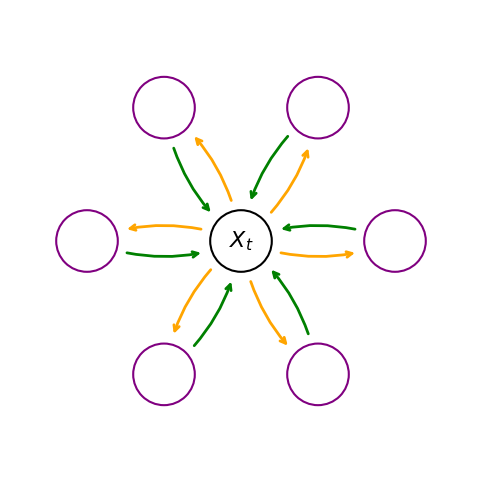

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')  # This ensures that the circles are round
ax.axis('off')  # Turn off the axis

# Define the central and surrounding node positions
center_node = (0, 0)
surrounding_nodes = [(np.cos(theta), np.sin(theta)) for theta in np.linspace(0, 2 * np.pi, 6, endpoint=False)]

# Draw the nodes
for node in surrounding_nodes:
    circle = plt.Circle(node, 0.2, edgecolor='purple', facecolor='none', lw=1.5)
    ax.add_patch(circle)
    

# Draw the central node
central_node_circle = plt.Circle(center_node, 0.2, edgecolor='black', facecolor='white', lw=1.5)
ax.add_patch(central_node_circle)
ax.text(*center_node, '$X_t$', ha='center', va='center', fontsize=16)

shrink_value = 30
# Draw the arrows
for node in surrounding_nodes:
    ax.annotate("",
                xy=center_node, xycoords='data',
                xytext=node, textcoords='data',
                arrowprops=dict(arrowstyle="->", color='green', lw=2,
                                connectionstyle="arc3,rad=0.2", shrinkA=shrink_value, shrinkB=shrink_value),
                )
    ax.annotate("",
                xy=node, xycoords='data',
                xytext=center_node, textcoords='data',
                arrowprops=dict(arrowstyle="->", color='orange', lw=2,
                                connectionstyle="arc3,rad=0.2", shrinkA=shrink_value, shrinkB=shrink_value),
                )

# Draw the legend
plt.savefig("chapman_kolmogorov.png")

plt.show()

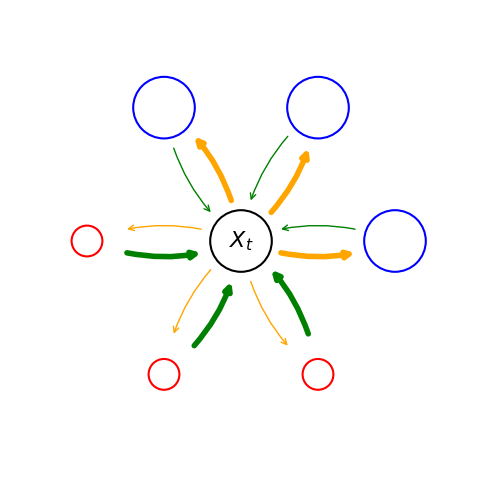

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')  # This ensures that the circles are round
ax.axis('off')  # Turn off the axis

# Define the central and surrounding node positions
center_node = (0, 0)
surrounding_nodes = [(np.cos(theta), np.sin(theta)) for theta in np.linspace(0, 2 * np.pi, 6, endpoint=False)]
big_nodes = surrounding_nodes[:3]
small_nodes = surrounding_nodes[3:]

# Draw the nodes
for node in big_nodes:
    circle = plt.Circle(node, 0.2, edgecolor='blue', facecolor='none', lw=1.5)
    ax.add_patch(circle)


# Draw the nodes
for node in small_nodes:
    circle = plt.Circle(node, 0.1, edgecolor='red', facecolor='none', lw=1.5)
    ax.add_patch(circle)


# Draw the central node
central_node_circle = plt.Circle(center_node, 0.2, edgecolor='black', facecolor='white', lw=1.5)
ax.add_patch(central_node_circle)
ax.text(*center_node, '$X_t$', ha='center', va='center', fontsize=16)

shrink_value = 30
# Draw the arrows
for node in big_nodes:
    ax.annotate("",
                xy=center_node, xycoords='data',
                xytext=node, textcoords='data',
                arrowprops=dict(arrowstyle="->", color='green', lw=1,
                                connectionstyle="arc3,rad=0.2", shrinkA=shrink_value, shrinkB=shrink_value),
                )
    ax.annotate("",
                xy=node, xycoords='data',
                xytext=center_node, textcoords='data',
                arrowprops=dict(arrowstyle="->", color='orange', lw=4,
                                connectionstyle="arc3,rad=0.2", shrinkA=shrink_value, shrinkB=shrink_value),
                )

for node in small_nodes:
    ax.annotate("",
                xy=center_node, xycoords='data',
                xytext=node, textcoords='data',
                arrowprops=dict(arrowstyle="->", color='green', lw=4,
                                connectionstyle="arc3,rad=0.2", shrinkA=shrink_value, shrinkB=shrink_value),
                )
    ax.annotate("",
                xy=node, xycoords='data',
                xytext=center_node, textcoords='data',
                arrowprops=dict(arrowstyle="->", color='orange', lw=1,
                                connectionstyle="arc3,rad=0.2", shrinkA=shrink_value, shrinkB=shrink_value),
                )


# Draw the legend
plt.savefig("bridge_chapman_kolmogorov.png")

plt.show()

In [14]:
len(surrounding_nodes)

6

# Diffusion Model Example

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 4.         # Speed of mean reversion
theta = 0.0      # Long-term mean
sigma = 0.1      # Volatility
X0 = 1.0         # Initial value
T = 1.0          # Time horizon
dt = 0.01        # Time step
N = int(T / dt)  # Number of time steps
num_paths = 300   # Number of paths to simulate

# Time array
time = np.linspace(0, T, N)

# Simulating multiple Ornstein-Uhlenbeck paths
paths = np.zeros((num_paths, N))
paths[:, 0] = X0

for i in range(1, N):
    dW = np.random.normal(scale=np.sqrt(dt), size=num_paths)  # Increment of Wiener process
    paths[:, i] = paths[:, i - 1] + mu * (theta - paths[:, i - 1]) * dt + sigma * dW

# Generating a 2D Gaussian distribution
x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
z = np.exp(-(x**2 + y**2))

In [10]:
from PIL import Image

file_path = "./Dog.webp"
# Convert the file format to PNG
image_path_corrected = './Dog.png'
image = Image.open(file_path)
image.save(image_path_corrected, 'PNG')

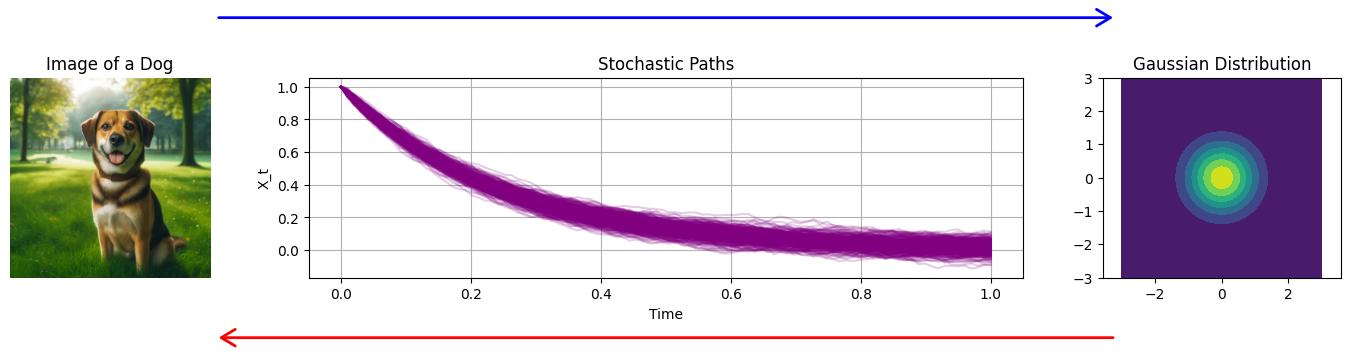

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.image import imread
from matplotlib.patches import FancyArrowPatch

# Load the corrected image
dog_image_corrected = imread(image_path_corrected)

# Create a grid for the subplots
fig = plt.figure(figsize=(15, 4))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 3, 1])  # Adjust width ratios here

# First subplot for the Gaussian
ax0 = plt.subplot(gs[2])
ax0.contourf(x, y, z, cmap='viridis')
ax0.set_title('Gaussian Distribution')
ax0.axis('equal')

# Second subplot for the Ornstein-Uhlenbeck paths
ax1 = plt.subplot(gs[1])
for i in range(num_paths):
    ax1.plot(time, paths[i],color="purple",alpha=0.2)
ax1.set_title('Stochastic Paths')
ax1.set_xlabel('Time')
ax1.set_ylabel('X_t')
ax1.grid(True)

# Third subplot for the image
ax2 = plt.subplot(gs[0])
ax2.imshow(dog_image_corrected)
ax2.set_title('Image of a Dog')
ax2.axis('off')  # Turning off axis for the image plot

top_y = 0.9
start_x = 0.2
end_x = 0.8

# Right-pointing arrow across the top using figure coordinates
arrow_top = FancyArrowPatch((start_x, top_y), (end_x, top_y), 
                            transform=fig.transFigure, 
                            color='blue', 
                            arrowstyle='->,head_length=0.5,head_width=0.3', 
                            linewidth=2, mutation_scale=20)
fig.patches.extend([arrow_top])

# Left-pointing arrow across the bottom using figure coordinates
arrow_bottom = FancyArrowPatch((end_x, 0.1), (start_x, 0.1), 
                               transform=fig.transFigure, 
                               color='red', 
                               arrowstyle='->,head_length=0.5,head_width=0.3', 
                               linewidth=2, mutation_scale=20)
fig.patches.extend([arrow_bottom])



# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.05, right=0.95, top=0.75, bottom=0.25)  # Adjust the margins here
plt.savefig("diffusion_paths.png")

plt.show()

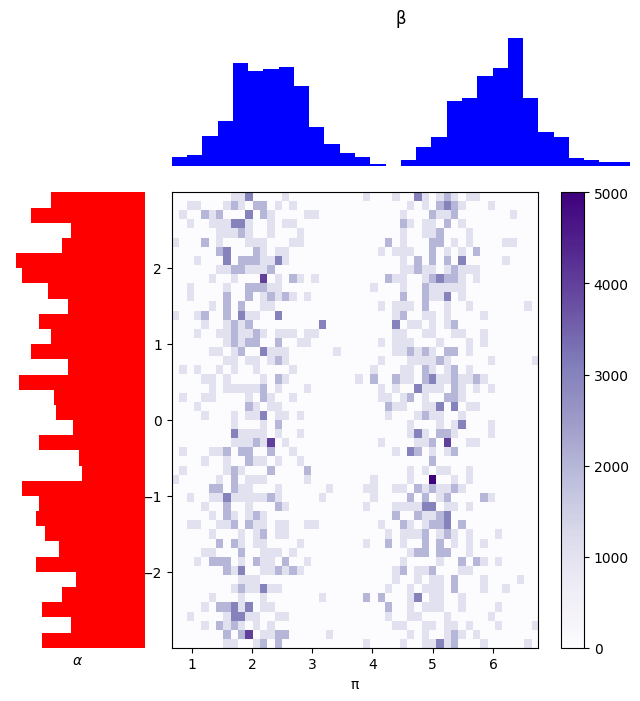

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(0)
n_samples = 1000

# Generate samples from two different Gaussians
x1, _ = make_blobs(n_samples=n_samples//2, centers=[[2, 0]], cluster_std=0.5)  # First Gaussian
x2, _ = make_blobs(n_samples=n_samples//2, centers=[[5, 0]], cluster_std=0.5)  # Second Gaussian
x = np.vstack((x1, x2))  # Combine into one dataset

y = np.random.uniform(-3, 3, size=n_samples)

# Calculate the density with a larger number of bins
x_density, x_bins = np.histogram(x[:, 0], bins=30, density=True)
y_density, y_bins = np.histogram(y, bins=30, density=True)

# Scale the density to the number of samples for histogram height
x_density = x_density * n_samples * np.diff(x_bins)
y_density = y_density * n_samples * np.diff(y_bins)

# Create a 2D histogram with more bins for smoother distribution
hist, x_edges, y_edges = np.histogram2d(x[:, 0], y, bins=50, density=True)

# Scale the 2D histogram for better visibility of joint mass
hist_scaled = hist * n_samples**2 * np.diff(x_edges[:2]) * np.diff(y_edges[:2])

# Plotting configuration (same as before)
fig = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
ax_main = fig.add_subplot(grid[1:, 1:])
ax_xDist = fig.add_subplot(grid[0, 1:], xticklabels=[])
ax_yDist = fig.add_subplot(grid[1:, 0], yticklabels=[])
ax_xDist.bar(x_bins[:-1], x_density, width=np.diff(x_bins), align='edge', color='blue')
ax_yDist.barh(y_bins[:-1], y_density, height=np.diff(y_bins), align='edge', color='red')
ax_yDist.invert_xaxis()
pos = ax_main.imshow(hist_scaled.T, origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], aspect='auto', cmap='Purples')
ax_main.set_xlim(x_bins[0], x_bins[-1])
ax_main.set_ylim(y_bins[0], y_bins[-1])
ax_xDist.set_xlim(ax_main.get_xlim())
ax_yDist.set_ylim(ax_main.get_ylim())
ax_xDist.set_yticks([])
ax_xDist.set_xticks([])
ax_yDist.set_yticks([])
ax_yDist.set_xticks([])
for ax in [ax_xDist, ax_yDist]:
    for spine in ax.spines.values():
        spine.set_visible(False)
ax_xDist.set_title('β')
ax_main.set_xlabel('π')
ax_yDist.set_xlabel(r'$\alpha$')
fig.colorbar(pos, ax=ax_main)
plt.savefig("coupling.png")
plt.show()
